In [1]:
%autosave 300
%reload_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

Autosaving every 300 seconds


In [2]:
import os

os.chdir(
    "/mnt/batch/tasks/shared/LS_root/mounts/clusters/copilot-model-run/code/Users/Soutrik.Chowdhury/pytorch_lightning_journey/lightning_basics"
)
print(os.getcwd())

/mnt/batch/tasks/shared/LS_root/mounts/clusters/copilot-model-run/code/Users/Soutrik.Chowdhury/pytorch_lightning_journey/lightning_basics


In [5]:
import lightning as L
import torch
import torch.nn.functional as F
import torchmetrics
from lightning.pytorch.callbacks import RichProgressBar, RichModelSummary

In [10]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [21]:
from modular.utils import show_failures, plot_csv_logs
from modular.engine import LightningMLP, TorchMLP, LightningData
from lightning.pytorch.loggers import CSVLogger

In [12]:
torch.manual_seed(71)
# setting up the data module
dm = LightningData(num_workers=0, batch_size=64)

# setting up the model
pytorch_model = TorchMLP(input_dim=784, hidden_dim=50, output_dim=10).to(device)

lightning_model = LightningMLP(
    model=pytorch_model,
    learning_rate=0.05,
)

# setting up the trainer module
trainer = L.Trainer(
    max_epochs=10,
    accelerator="auto",
    devices="auto",
    enable_progress_bar=True,
    enable_model_summary=True,
    callbacks=[RichProgressBar(), RichModelSummary(max_depth=-1)],
    logger=CSVLogger(save_dir="./csv_logs"),
)

# setting up the fit model
trainer.fit(model=lightning_model, datamodule=dm)

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name       ┃ Type               ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model      │ TorchMLP           │ 45.4 K │ train │
│ 1 │ model.fc1  │ Linear             │ 39.2 K │ train │
│ 2 │ model.fc2  │ Linear             │  5.1 K │ train │
│ 3 │ model.fc3  │ Linear             │  1.0 K │ train │
│ 4 │ model.relu │ ReLU               │      0 │ train │
│ 5 │ criterion  │ CrossEntropyLoss   │      0 │ train │
│ 6 │ train_acc  │ MulticlassAccuracy │      0 │ train │
│ 7 │ test_acc   │ MulticlassAccuracy │      0 │ train │
└───┴────────────┴────────────────────┴────────┴───────┘

Trainable params: 45.4 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 45.4 K                                                                                               
Total estimated model params size (MB): 0

Output()

/anaconda/envs/torch_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: 
The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.

/anaconda/envs/torch_env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: 
The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=10` reached.


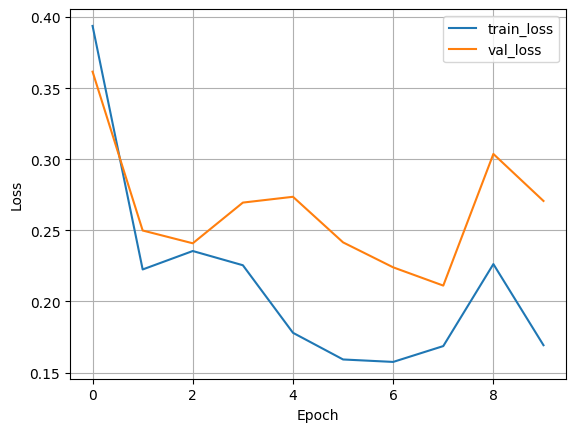

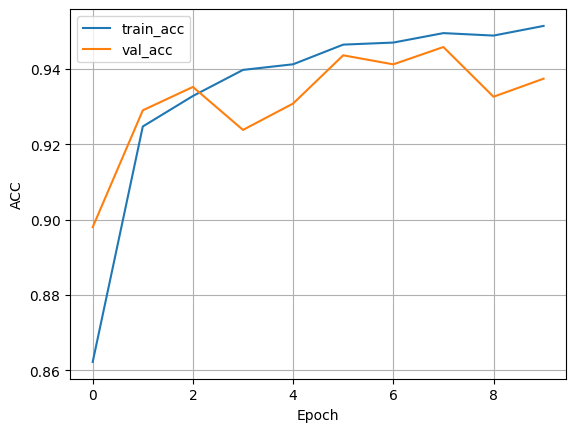

In [13]:
plot_csv_logs(trainer)

In [14]:
os.makedirs('./model',exist_ok=True)b
trainer.save_checkpoint("./models/model.ckpt")

In [18]:
val_acc = trainer.validate(datamodule=dm, ckpt_path="best")[0]["val_acc"]
test_acc = trainer.test(datamodule=dm, ckpt_path="best")[0]["test_acc"]
print(f" | Val Acc {val_acc*100:.2f}%" f" | Test Acc {test_acc*100:.2f}%")

Restoring states from the checkpoint path at ./csv_logs/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./csv_logs/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.9373999834060669     │
│         val_loss          │    0.27067241072654724    │
└───────────────────────────┴───────────────────────────┘

Restoring states from the checkpoint path at ./csv_logs/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./csv_logs/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9444000124931335     │
└───────────────────────────┴───────────────────────────┘

 | Val Acc 93.74% | Test Acc 94.44%


#### Evaluation post training

In [22]:
torch.manual_seed(71)
# setting up the data module
dm = LightningData(num_workers=0, batch_size=64)
dm.setup(stage="test")

In [23]:
# setting up the model
pytorch_model = TorchMLP(input_dim=784, hidden_dim=50, output_dim=10).to(device)

In [25]:
lightning_model = LightningMLP.load_from_checkpoint(
    checkpoint_path="./models/model.ckpt", model=pytorch_model
)
lightning_model.eval()

LightningMLP(
  (model): TorchMLP(
    (fc1): Linear(in_features=784, out_features=50, bias=True)
    (fc2): Linear(in_features=50, out_features=100, bias=True)
    (fc3): Linear(in_features=100, out_features=10, bias=True)
    (relu): ReLU()
  )
  (criterion): CrossEntropyLoss()
  (train_acc): MulticlassAccuracy()
  (test_acc): MulticlassAccuracy()
)

In [26]:
test_dataloader = dm.test_dataloader()
acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)

for batch in test_dataloader:
    features, true_labels = batch

    with torch.inference_mode():
        logits = lightning_model(features)

    predicted_labels = torch.argmax(logits, dim=1)
    acc(predicted_labels, true_labels)

predicted_labels[:5]

tensor([1, 2, 3, 4, 5])

In [27]:
test_acc = acc.compute()
print(f"Test accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

Test accuracy: 0.9444 (94.44%)


In [28]:
class_dict = {
    0: "digit 0",
    1: "digit 1",
    2: "digit 2",
    3: "digit 3",
    4: "digit 4",
    5: "digit 5",
    6: "digit 6",
    7: "digit 7",
    8: "digit 8",
    9: "digit 9",
}

(<Figure size 640x480 with 15 Axes>,
 array([[<Axes: title={'center': 'P: digit 7\nT: digit 9'}>,
         <Axes: title={'center': 'P: digit 0\nT: digit 4'}>,
         <Axes: title={'center': 'P: digit 3\nT: digit 2'}>,
         <Axes: title={'center': 'P: digit 9\nT: digit 1'}>,
         <Axes: title={'center': 'P: digit 8\nT: digit 4'}>],
        [<Axes: title={'center': 'P: digit 4\nT: digit 2'}>,
         <Axes: title={'center': 'P: digit 3\nT: digit 9'}>,
         <Axes: title={'center': 'P: digit 3\nT: digit 5'}>,
         <Axes: title={'center': 'P: digit 3\nT: digit 8'}>,
         <Axes: title={'center': 'P: digit 8\nT: digit 9'}>],
        [<Axes: title={'center': 'P: digit 5\nT: digit 3'}>,
         <Axes: title={'center': 'P: digit 2\nT: digit 4'}>,
         <Axes: title={'center': 'P: digit 0\nT: digit 6'}>,
         <Axes: title={'center': 'P: digit 3\nT: digit 5'}>,
         <Axes: title={'center': 'P: digit 4\nT: digit 8'}>]], dtype=object))

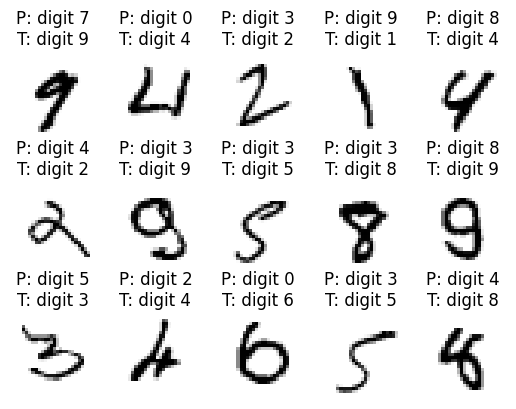

In [29]:
show_failures(model=lightning_model, data_loader=test_dataloader, class_dict=class_dict)

In [36]:
trainer.checkpoint_callbacks[0].best_model_path

'./csv_logs/lightning_logs/version_2/checkpoints/epoch=9-step=8600.ckpt'

#####################---------------------------------------------############################